In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 16.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl


In [ ]:
weight = ctrl.Antecedent(np.arange(0, 1100, 1), 'weight')
food_type = ctrl.Antecedent(np.arange(0, 3, 1), 'food_type')
initial = ctrl.Antecedent(np.arange(0, 61, 1), 'initial')
water = ctrl.Antecedent(np.arange(0, 3, 1), 'water')

time = ctrl.Consequent(np.arange(0, 61, 1), 'time')
heat = ctrl.Consequent(np.arange(0, 101, 1), 'heat')


In [ ]:
weight['light'] = fuzz.trimf(weight.universe, [0, 0, 300])
weight['medium'] = fuzz.trimf(weight.universe, [200, 500, 800])
weight['heavy'] = fuzz.trimf(weight.universe, [600, 1000, 1000])

food_type['soft'] = fuzz.trimf(food_type.universe, [0, 0, 1])
food_type['medium'] = fuzz.trimf(food_type.universe, [0, 1, 2])
food_type['hard'] = fuzz.trimf(food_type.universe, [1, 2, 2])

initial['cold'] = fuzz.trimf(initial.universe, [0, 0, 20])
initial['warm'] = fuzz.trimf(initial.universe, [10, 30, 40])
initial['hot'] = fuzz.trimf(initial.universe, [30, 60, 60])

water['low'] = fuzz.trimf(water.universe, [0, 0, 1])
water['medium'] = fuzz.trimf(water.universe, [0, 1, 2])
water['high'] = fuzz.trimf(water.universe, [1, 2, 2])

time['short'] = fuzz.trimf(time.universe, [0, 0, 20])
time['medium'] = fuzz.trimf(time.universe, [10, 30, 50])
time['long'] = fuzz.trimf(time.universe, [40, 60, 60])

heat['low'] = fuzz.trimf(heat.universe, [0, 0, 40])
heat['medium'] = fuzz.trimf(heat.universe, [30, 60, 80])
heat['high'] = fuzz.trimf(heat.universe, [70, 100, 100])


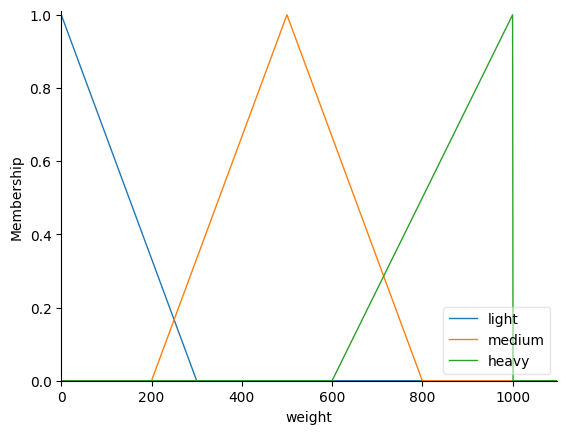

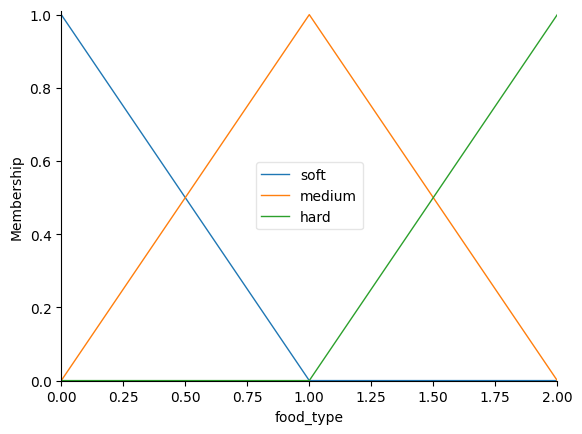

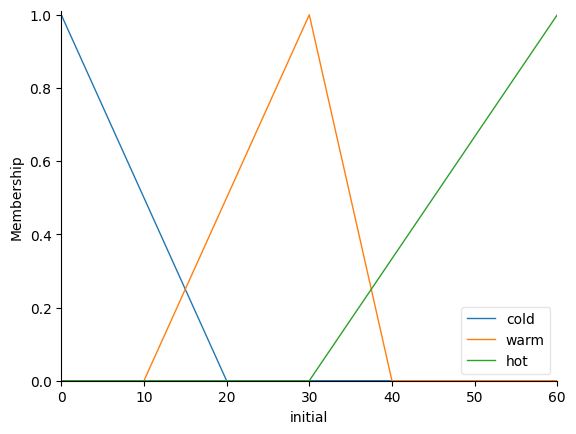

In [ ]:
weight.view()
food_type.view()
initial.view()


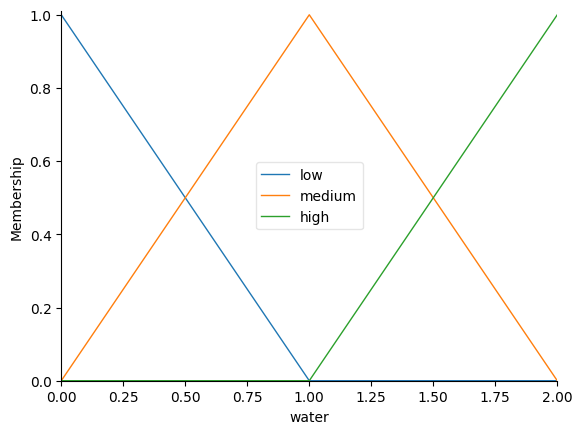

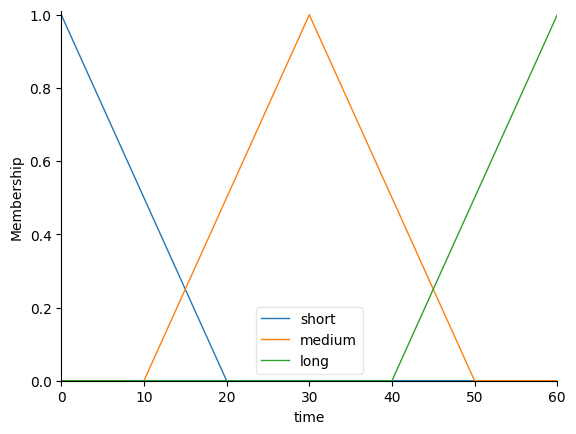

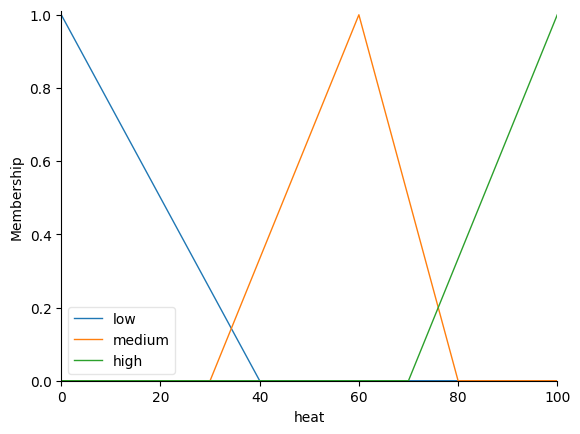

In [ ]:
water.view()
time.view()
heat.view()


In [ ]:
rule1 = ctrl.Rule(weight['light'], time['short'])
rule2 = ctrl.Rule(weight['medium'], time['medium'])
rule3 = ctrl.Rule(weight['heavy'], time['long'])

rule4 = ctrl.Rule(food_type['soft'], heat['low'])
rule5 = ctrl.Rule(food_type['medium'], heat['medium'])
rule6 = ctrl.Rule(food_type['hard'], heat['high'])

rule7 = ctrl.Rule(water['low'], time['long'])
rule8 = ctrl.Rule(water['medium'], time['medium'])
rule9 = ctrl.Rule(water['high'], time['short'])

rule10 = ctrl.Rule(water['low'], heat['high'])
rule11 = ctrl.Rule(water['medium'], heat['medium'])
rule12 = ctrl.Rule(water['high'], heat['low'])

rule13 = ctrl.Rule(weight['heavy'] & food_type['hard'] & initial['cold'],
                   [time['long'], heat['high']])
rule14 = ctrl.Rule(weight['medium'] & food_type['soft'] & initial['warm'],
                   [time['medium'], heat['low']])
rule15 = ctrl.Rule(weight['light'] & food_type['medium'] & initial['hot'],
                   [time['short'], heat['medium']])

In [ ]:

control_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,
                                     rule7, rule8, rule9, rule10, rule11, rule12,
                                     rule13, rule14, rule15])
system = ctrl.ControlSystemSimulation(control_system)

system.input['food_type'] = 2
system.input['weight'] = 1
system.input['initial'] = 0
system.input['water'] = 2

system.compute()

print(f"Cooking Time: {system.output['time']}")
print(f"Heat Level: {system.output['heat']}")


Cooking Time: 6.666666666666667
Heat Level: 46.19047619047619
